<a href="https://colab.research.google.com/github/kiranrohra-afk/CxC-Datathon-SAP/blob/main/SAP_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()




Saving SAP_dataset.xlsx to SAP_dataset.xlsx


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



# load the uploaded file (RENAME as SAP_dataset.xlsx)
df = pd.read_excel('SAP_dataset.xlsx')

# view the first few rows of the dataframe
df.head()


,Country Name,Country Code,Indicator Name,Topic,short description,long description,Indicator Code,Unit of measure,2000,2001,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,NaN,NaN,...,1.014232,1.248461,1.232735,1.239377,1.207429,1.174703,1.199392,0.801611,0.756785,NaN
1,Africa Eastern and Southern,AFE,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,-1.271724,NaN,...,-1.364743,-1.354240,-1.540353,-1.531910,-1.502881,-1.419499,-1.493700,-1.152327,-1.183776,NaN
3,Africa Western and Central,AFW,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Control of Corruption: Estimate,Public Sector: Policy & institutions,NaN,NaN,CC.EST,0,-1.197514,NaN,...,-1.457798,-1.427323,-1.483337,-1.444333,-1.199251,-1.058418,-0.938673,-0.651610,-0.601941,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23141 entries, 0 to 23140
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       23141 non-null  object 
 1   Country Code       23141 non-null  object 
 2   Indicator Name     23141 non-null  object 
 3   Topic              23141 non-null  object 
 4   short description  1594 non-null   object 
 5   long description   22875 non-null  object 
 6   Indicator Code     23141 non-null  object 
 7   Unit of measure    23140 non-null  object 
 8   2000               11376 non-null  float64
 9   2001               9576 non-null   float64
 10  2002               10009 non-null  float64
 11  2003               10012 non-null  float64
 12  2004               10229 non-null  float64
 13  2005               10798 non-null  float64
 14  2006               10662 non-null  float64
 15  2007               10542 non-null  float64
 16  2008               106

In [6]:
df["Country Name"].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [7]:
countries = [
    'Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates',
    'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
    'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria',
    'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
    'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana',
    'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China',
    "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
    'Cabo Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands', 'Cyprus', 'Czechia',
    'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
    'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
    'Fiji', 'France', 'Faroe Islands', 'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom',
    'Georgia', 'Ghana', 'Gibraltar', 'Guinea', 'Gambia, The', 'Guinea-Bissau',
    'Equatorial Guinea', 'Greece', 'Grenada', 'Greenland', 'Guatemala', 'Guam', 'Guyana',
    'Hong Kong SAR, China', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 'India', 'Ireland',
    'Iran, Islamic Rep.', 'Iraq', 'Iceland', 'Israel', 'Italy', 'Jamaica', 'Jordan',
    'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Cambodia', 'Kiribati',
    'St. Kitts and Nevis', 'Korea, Rep.', 'Kuwait', 'Lao PDR', 'Lebanon', 'Liberia',
    'Libya', 'St. Lucia', 'Liechtenstein', 'Sri Lanka', 'Lithuania', 'Luxembourg',
    'Latvia', 'Macao SAR, China', 'St. Martin (French part)', 'Morocco', 'Monaco',
    'Moldova', 'Madagascar', 'Maldives', 'Mexico', 'Marshall Islands', 'North Macedonia',
    'Mali', 'Malta', 'Myanmar', 'Montenegro', 'Mongolia', 'Northern Mariana Islands',
    'Mozambique', 'Mauritania', 'Mauritius', 'Malawi', 'Malaysia', 'Namibia',
    'New Caledonia', 'Niger', 'Nigeria', 'Nicaragua', 'Netherlands', 'Norway', 'Nepal',
    'Nauru', 'New Zealand', 'Oman', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Palau',
    'Papua New Guinea', 'Poland', 'Puerto Rico', "Korea, Dem. People's Rep.", 'Portugal',
    'Paraguay', 'West Bank and Gaza', 'French Polynesia', 'Qatar', 'Romania',
    'Russian Federation', 'Rwanda', 'Saudi Arabia', 'Sudan', 'Senegal', 'Singapore',
    'Solomon Islands', 'Sierra Leone', 'El Salvador', 'San Marino', 'Somalia', 'Serbia',
    'South Sudan', 'Sao Tome and Principe', 'Suriname', 'Slovak Republic', 'Slovenia',
    'Sweden', 'Eswatini', 'Sint Maarten (Dutch part)', 'Seychelles', 'Syrian Arab Republic',
    'Turks and Caicos Islands', 'Chad', 'Togo', 'Thailand', 'Tajikistan', 'Turkmenistan',
    'Timor-Leste', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkiye', 'Tuvalu',
    'Tanzania', 'Uganda', 'Ukraine', 'Uruguay', 'United States', 'Uzbekistan',
    'St. Vincent and the Grenadines', 'Venezuela, RB', 'British Virgin Islands',
    'Virgin Islands (U.S.)', 'Viet Nam', 'Vanuatu', 'Samoa', 'Kosovo', 'Yemen, Rep.',
    'South Africa', 'Zambia', 'Zimbabwe'
]

groupings = [
    'Africa Eastern and Southern', 'Africa Western and Central', 'Arab World',
    'Central Europe and the Baltics', 'Caribbean small states',
    'East Asia & Pacific (excluding high income)', 'Early-demographic dividend',
    'East Asia & Pacific', 'Europe & Central Asia (excluding high income)',
    'Europe & Central Asia', 'Euro area', 'European Union',
    'Fragile and conflict affected situations', 'High income',
    'Heavily indebted poor countries (HIPC)', 'IBRD only', 'IDA & IBRD total',
    'IDA total', 'IDA blend', 'Indonesia', 'IDA only', 'Isle of Man',
    'Not classified', 'Latin America & Caribbean (excluding high income)',
    'Latin America & Caribbean', 'Least developed countries: UN classification',
    'Low income', 'Lower middle income', 'Low & middle income',
    'Late-demographic dividend', 'Middle East & North Africa',
    'Middle income', 'Middle East & North Africa (excluding high income)',
    'North America', 'OECD members', 'Other small states',
    'Pre-demographic dividend', 'Pacific island small states',
    'Post-demographic dividend', 'South Asia',
    'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa',
    'Small states', 'East Asia & Pacific (IDA & IBRD countries)',
    'Europe & Central Asia (IDA & IBRD countries)',
    'Latin America & the Caribbean (IDA & IBRD countries)',
    'Middle East & North Africa (IDA & IBRD countries)', 'South Asia (IDA & IBRD)',
    'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income', 'World'
]

len(countries), len(groupings), len(df["Country Name"].unique())

(214, 51, 266)

In [8]:
df["Indicator Name"].unique()

array(['Control of Corruption: Estimate',
       'Multilateral debt service (% of public and publicly guaranteed debt service)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity, rural (% of rural population)',
       'Access to electricity, urban (% of urban population)',
       'Access to electricity (% of population)',
       'Compensation of employees (current LCU)',
       'Compensation of employees (% of expense)',
       'Adjusted savings: education expenditure (current US$)',
       'Adjusted net national income per capita (current US$)',
       'Terms of trade adjustment (constant LCU)',
       'Adequacy of social protection and labor programs (% of total welfare of beneficiary households)',
       'Adequacy of unemployment benefits and 

In [9]:
df['Topic'].unique()

array(['Public Sector: Policy & institutions',
       'Economic Policy & Debt: External debt: Debt ratios & other items',
       'Environment: Energy production & use',
       'Public Sector: Government finance: Expense',
       'Economic Policy & Debt: National accounts: Adjusted savings & income',
       'Economic Policy & Debt: National accounts: Local currency at constant prices: Other items',
       'Social Protection & Labor: Performance', 'Education: Outcomes',
       'Education: Participation', 'Education: Inputs',
       'Health: Risk factors', 'Health: Disease prevention',
       'Health: Health systems', 'Health: Reproductive health',
       'Poverty: Income distribution', 'Poverty: Poverty rates',
       'Social Protection & Labor: Economic activity',
       'Social Protection & Labor: Unemployment',
       'Social Protection & Labor: Migration',
       'Health: Population: Dynamics', 'Gender: Agency',
       'Health: Population: Structure',
       'Environment: Density & u

In [10]:
df[['Indicator Name', 'Topic', 'Country Name']].nunique()

,0
Indicator Name,88
Topic,23
Country Name,266


In [11]:
df.groupby(['Topic'])['Indicator Name'].apply(lambda grp: list(grp.value_counts().index)).to_dict()

{'Economic Policy & Debt: External debt: Debt ratios & other items': ['Multilateral debt service (% of public and publicly guaranteed debt service)'],
 'Economic Policy & Debt: National accounts: Adjusted savings & income': ['Adjusted savings: education expenditure (current US$)',
  'Adjusted net national income per capita (current US$)'],
 'Economic Policy & Debt: National accounts: Local currency at constant prices: Other items': ['Terms of trade adjustment (constant LCU)'],
 'Education: Inputs': ['Expenditure on primary education (% of government expenditure on education)',
  'Expenditure on secondary education (% of government expenditure on education)',
  'Expenditure on tertiary education (% of government expenditure on education)'],
 'Education: Outcomes': ['Literacy rate, youth female (% of females ages 15-24)',
  'Literacy rate, youth (ages 15-24), gender parity index (GPI)',
  'Literacy rate, youth male (% of males ages 15-24)',
  'Literacy rate, youth total (% of people ages

In [12]:
# df_cleaning=df = df_selected.dropna(axis=1, thresh=len(df_selected)*0.5 )  # Keeps columns with at least 50% non-null values
df_cleaning = df.drop(['Country Name', 'Indicator Name', 'short description', 'long description'], axis=1)

df_cleaning

,Country Code,Topic,Indicator Code,Unit of measure,2000,2001,2002,2003,2004,2005,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,Public Sector: Policy & institutions,CC.EST,0,NaN,NaN,NaN,NaN,1.165965,1.269663,...,1.014232,1.248461,1.232735,1.239377,1.207429,1.174703,1.199392,0.801611,0.756785,NaN
1,AFE,Public Sector: Policy & institutions,CC.EST,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Public Sector: Policy & institutions,CC.EST,0,-1.271724,NaN,-1.251137,-1.344180,-1.350647,-1.447252,...,-1.364743,-1.354240,-1.540353,-1.531910,-1.502881,-1.419499,-1.493700,-1.152327,-1.183776,NaN
3,AFW,Public Sector: Policy & institutions,CC.EST,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Public Sector: Policy & institutions,CC.EST,0,-1.197514,NaN,-1.155493,-1.335463,-1.377569,-1.323182,...,-1.457798,-1.427323,-1.483337,-1.444333,-1.199251,-1.058418,-0.938673,-0.651610,-0.601941,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23136,XKX,Environment: Density & urbanization,SP.URB.TOTL.IN.ZS,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23137,YEM,Environment: Density & urbanization,SP.URB.TOTL.IN.ZS,0,26.267000,26.787,27.315000,27.849000,28.390000,28.936000,...,34.165000,34.777000,35.394000,36.016000,36.642000,37.273000,37.908000,38.546000,39.188000,39.831
23138,ZAF,Environment: Density & urbanization,SP.URB.TOTL.IN.ZS,0,56.891000,57.368,57.898000,58.446000,58.993000,59.536000,...,64.312000,64.828000,65.341000,65.850000,66.355000,66.856000,67.354000,67.847000,68.335000,68.819
23139,ZMB,Environment: Density & urbanization,SP.URB.TOTL.IN.ZS,0,34.802000,35.002,35.475000,35.951000,36.430000,36.911000,...,41.382000,41.907000,42.438000,42.976000,43.521000,44.072000,44.629000,45.192000,45.761000,46.335


In [13]:
df_cleaning

,Country Code,Topic,Indicator Code,Unit of measure,2000,2001,2002,2003,2004,2005,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABW,Public Sector: Policy & institutions,CC.EST,0,NaN,NaN,NaN,NaN,1.165965,1.269663,...,1.014232,1.248461,1.232735,1.239377,1.207429,1.174703,1.199392,0.801611,0.756785,NaN
1,AFE,Public Sector: Policy & institutions,CC.EST,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Public Sector: Policy & institutions,CC.EST,0,-1.271724,NaN,-1.251137,-1.344180,-1.350647,-1.447252,...,-1.364743,-1.354240,-1.540353,-1.531910,-1.502881,-1.419499,-1.493700,-1.152327,-1.183776,NaN
3,AFW,Public Sector: Policy & institutions,CC.EST,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Public Sector: Policy & institutions,CC.EST,0,-1.197514,NaN,-1.155493,-1.335463,-1.377569,-1.323182,...,-1.457798,-1.427323,-1.483337,-1.444333,-1.199251,-1.058418,-0.938673,-0.651610,-0.601941,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23136,XKX,Environment: Density & urbanization,SP.URB.TOTL.IN.ZS,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23137,YEM,Environment: Density & urbanization,SP.URB.TOTL.IN.ZS,0,26.267000,26.787,27.315000,27.849000,28.390000,28.936000,...,34.165000,34.777000,35.394000,36.016000,36.642000,37.273000,37.908000,38.546000,39.188000,39.831
23138,ZAF,Environment: Density & urbanization,SP.URB.TOTL.IN.ZS,0,56.891000,57.368,57.898000,58.446000,58.993000,59.536000,...,64.312000,64.828000,65.341000,65.850000,66.355000,66.856000,67.354000,67.847000,68.335000,68.819
23139,ZMB,Environment: Density & urbanization,SP.URB.TOTL.IN.ZS,0,34.802000,35.002,35.475000,35.951000,36.430000,36.911000,...,41.382000,41.907000,42.438000,42.976000,43.521000,44.072000,44.629000,45.192000,45.761000,46.335


In [14]:
len(df_cleaning.columns)

28

In [15]:
df["Topic"].unique()

array(['Public Sector: Policy & institutions',
       'Economic Policy & Debt: External debt: Debt ratios & other items',
       'Environment: Energy production & use',
       'Public Sector: Government finance: Expense',
       'Economic Policy & Debt: National accounts: Adjusted savings & income',
       'Economic Policy & Debt: National accounts: Local currency at constant prices: Other items',
       'Social Protection & Labor: Performance', 'Education: Outcomes',
       'Education: Participation', 'Education: Inputs',
       'Health: Risk factors', 'Health: Disease prevention',
       'Health: Health systems', 'Health: Reproductive health',
       'Poverty: Income distribution', 'Poverty: Poverty rates',
       'Social Protection & Labor: Economic activity',
       'Social Protection & Labor: Unemployment',
       'Social Protection & Labor: Migration',
       'Health: Population: Dynamics', 'Gender: Agency',
       'Health: Population: Structure',
       'Environment: Density & u

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select only numeric features
num_features = df_cleaning.select_dtypes(include=["number"])

# Handle missing values by replacing them with the mean
imputer = SimpleImputer(strategy="mean")
num_features_imputed = pd.DataFrame(num_features_imputed, columns=num_features.columns, index=df_cleaning.index)

# Scale features for better clustering
scaler = StandardScaler()
num_features_scaled = scaler.fit_transform(num_features_imputed)

# Update df_cleaning with imputed values
df_cleaning[num_features.columns] = num_features_imputed
df_cleaning

NameError: name 'num_features_imputed' is not defined

In [17]:

df_pivoted = df.pivot(index='Country Name', columns='Indicator Name',values=list(map(str, range(2000, 2024))))
df_pivoted.columns = ['_'.join(map(str, col)) for col in df_pivoted.columns]
df_pivoted.columns
df_pivoted = df_pivoted.reset_index()
df_melted = df_pivoted.melt(id_vars=['Country Name'], var_name='Year_Indicator', value_name='Value')
df_melted[['Year', 'Indicator']] = df_melted['Year_Indicator'].str.split('_', expand=True)
df_melted = df_melted.drop(columns='Year_Indicator')  # drop the original 'Indicator_Year' column
df_melted = df_melted.merge(df[['Country Name', 'Country Code']], on='Country Name', how='left')
df_melted


,Country Name,Value,Year,Indicator,Country Code
0,Afghanistan,5.5,2000,Access to clean fuels and technologies for coo...,AFG
1,Afghanistan,5.5,2000,Access to clean fuels and technologies for coo...,AFG
2,Afghanistan,5.5,2000,Access to clean fuels and technologies for coo...,AFG
3,Afghanistan,5.5,2000,Access to clean fuels and technologies for coo...,AFG
4,Afghanistan,5.5,2000,Access to clean fuels and technologies for coo...,AFG
...,...,...,...,...,...
48873787,Zimbabwe,NaN,2023,Women who were first married by age 18 (% of w...,ZWE
48873788,Zimbabwe,NaN,2023,Women who were first married by age 18 (% of w...,ZWE
48873789,Zimbabwe,NaN,2023,Women who were first married by age 18 (% of w...,ZWE
48873790,Zimbabwe,NaN,2023,Women who were first married by age 18 (% of w...,ZWE


In [18]:

df_pivoted
df_numeric = df_pivoted.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix on the numeric data
corr_matrix = df_numeric.corr()

# Display the correlation matrix
corr_matrix

,2000_Access to clean fuels and technologies for cooking (% of population),"2000_Access to clean fuels and technologies for cooking, rural (% of rural population)","2000_Access to clean fuels and technologies for cooking, urban (% of urban population)",2000_Access to electricity (% of population),"2000_Access to electricity, rural (% of rural population)","2000_Access to electricity, urban (% of urban population)",2000_Adequacy of social insurance programs (% of total welfare of beneficiary households),2000_Adequacy of social protection and labor programs (% of total welfare of beneficiary households),2000_Adequacy of social safety net programs (% of total welfare of beneficiary households),2000_Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households),...,2023_Unemployment with basic education (% of total labor force with basic education),2023_Unemployment with intermediate education (% of total labor force with intermediate education),"2023_Unemployment, total (% of total labor force) (national estimate)",2023_Urban population (% of total population),"2023_Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","2023_Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","2023_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",2023_Wanted fertility rate (births per woman),2023_Women who were first married by age 15 (% of women ages 20-24),2023_Women who were first married by age 18 (% of women ages 20-24)
2000_Access to clean fuels and technologies for cooking (% of population),1.000000,0.963606,0.946888,0.853091,0.827297,0.714317,NaN,NaN,NaN,NaN,...,0.210785,-0.249168,-0.115184,0.677884,NaN,NaN,NaN,-0.996581,-0.970506,-0.882867
"2000_Access to clean fuels and technologies for cooking, rural (% of rural population)",0.963606,1.000000,0.851725,0.779154,0.797164,0.626552,NaN,NaN,NaN,NaN,...,0.219395,-0.273930,-0.147266,0.623480,NaN,NaN,NaN,-0.980027,-0.968711,-0.898299
"2000_Access to clean fuels and technologies for cooking, urban (% of urban population)",0.946888,0.851725,1.000000,0.848990,0.793125,0.767296,NaN,NaN,NaN,NaN,...,0.151767,-0.248512,-0.117742,0.599846,NaN,NaN,NaN,-0.890693,-0.900962,-0.786716
2000_Access to electricity (% of population),0.853091,0.779154,0.848990,1.000000,0.967324,0.904472,NaN,NaN,NaN,NaN,...,0.057071,-0.394676,-0.229836,0.645099,NaN,NaN,NaN,-0.996228,-0.964667,-0.881528
"2000_Access to electricity, rural (% of rural population)",0.827297,0.797164,0.793125,0.967324,1.000000,0.814102,NaN,NaN,NaN,NaN,...,0.135701,-0.307910,-0.173669,0.537081,NaN,NaN,NaN,-1.000000,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"2023_Wage and salaried workers, male (% of male employment) (modeled ILO estimate)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2023_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023_Wanted fertility rate (births per woman),-0.996581,-0.980027,-0.890693,-0.996228,-1.000000,-0.893878,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.998157,NaN,NaN,NaN,1.000000,NaN,NaN
2023_Women who were first married by age 15 (% of women ages 20-24),-0.970506,-0.968711,-0.900962,-0.964667,-1.000000,-0.862999,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.870545,NaN,NaN,NaN,NaN,1.000000,0.968227


In [19]:
df_melted["Year"].unique()



array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [21]:
import plotly.express as px

# example for a heatmap on a world map for a specific year and indicator
year = "2020"  # example year
indicator_name = 'Access to clean fuels and technologies for cooking (% of population)'  # example indicator

# filter data for the selected year and indicator
df_filtered = df_melted[(df_melted['Year'] == year) & (df_melted['Indicator'] == indicator_name)]


In [22]:
fig = px.choropleth(df_filtered,
                    locations='Country Code',  # location by country name
                    color='Value',  # values that will be visualized as color intensity
                    hover_name='Country Code',
                    color_continuous_scale='Viridis',
                    title=f'{indicator_name} Heatmap for {year}')

fig.show()


In [25]:
!pip install dash
import dash
from dash import dcc, html
import plotly.express as px

# create Dash app
app = dash.Dash(__name__)

# dropdowns for indicator and year selection
app.layout = html.Div([
    html.H1("Interactive World Map Visualization"),

    # Dropdown for indicator selection
    dcc.Dropdown(
        id='indicator-dropdown',
        options=[{'label': i, 'value': i} for i in df_melted['Indicator'].unique()],
        value='Access to clean fuels and technologies for cooking (% of population)',
        multi=False
    ),

    # Dropdown for year selection
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': str(year), 'value': year} for year in range(2000, 2024)],
        value=2020,  # default value
        multi=False
    ),

    # Graph for the heatmap
    dcc.Graph(id='world-map')
])

# callback to update map based on user selection
@app.callback(
    dash.dependencies.Output('world-map', 'figure'),
    [dash.dependencies.Input('indicator-dropdown', 'value'),
     dash.dependencies.Input('year-dropdown', 'value')]
)
def update_map(indicator, year):
    # filter data
    year=str(year)
    df_filtered = df_melted[(df_melted['Year'] == year) & (df_melted['Indicator'] == indicator)]

    # create the map
    fig = px.choropleth(df_filtered,
                        locations='Country Code',
                        color='Value',
                        hover_name='Country Code',
                        color_continuous_scale='Viridis',
                        title=f'{indicator} Heatmap for {year}')
    return fig

# run the app
if __name__ == '__main__':
    app.run_server(debug=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


<IPython.core.display.Javascript object>

In [26]:
df_countries= df_melted[df_melted["Country Name"].isin(countries)]
df_countries["Indicator"].unique()

array(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       'Access to electricity (% of population)',
       'Access to electricity, rural (% of rural population)',
       'Access to electricity, urban (% of urban population)',
       'Adequacy of social insurance programs (% of total welfare of beneficiary households)',
       'Adequacy of social protection and labor programs (% of total welfare of beneficiary households)',
       'Adequacy of social safety net programs (% of total welfare of beneficiary households)',
       'Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)',
       'Adjusted net national income per capita (current US$)',
       'Adjusted savings: education expenditure (current US$)',
       'Adolescent fertility rate (b

In [30]:
df_numeric = df_pivoted.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns to drop
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.90)]

# Drop the highly correlated columns
df_cleaned = df_pivoted.drop(columns=to_drop)

df_cleaned


,Country Name,2000_Access to clean fuels and technologies for cooking (% of population),2000_Access to electricity (% of population),2000_Adequacy of social insurance programs (% of total welfare of beneficiary households),2000_Adequacy of social protection and labor programs (% of total welfare of beneficiary households),2000_Adequacy of social safety net programs (% of total welfare of beneficiary households),2000_Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households),2000_Adjusted net national income per capita (current US$),2000_Adjusted savings: education expenditure (current US$),"2000_Adolescent fertility rate (births per 1,000 women ages 15-19)",...,2023_People using safely managed drinking water services (% of population),2023_Political Stability and Absence of Violence/Terrorism: Estimate,"2023_Population, total",2023_Pregnant women receiving prenatal care (%),"2023_School enrollment, primary (gross), gender parity index (GPI)","2023_School enrollment, secondary (gross), gender parity index (GPI)","2023_Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","2023_Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","2023_Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","2023_Wage and salaried workers, total (% of total employment) (modeled ILO estimate)"
0,Afghanistan,5.500000,4.400000,NaN,NaN,NaN,NaN,NaN,NaN,152.572000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,11.525904,19.963882,NaN,NaN,NaN,NaN,578.032604,NaN,123.134769,...,NaN,NaN,739108306.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa Western and Central,4.999422,34.143210,NaN,NaN,NaN,NaN,365.475332,NaN,135.384758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.200000,99.400000,NaN,NaN,NaN,NaN,1038.956686,1.035291e+08,14.792000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,96.400000,98.600000,NaN,NaN,NaN,NaN,1298.795024,2.326532e+09,9.302000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,NaN,99.700000,NaN,NaN,NaN,NaN,NaN,2.070782e+08,91.024000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,World,49.296068,78.354362,NaN,NaN,NaN,NaN,4565.451808,NaN,64.435821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,"Yemen, Rep.",54.650000,49.200000,NaN,NaN,NaN,NaN,310.223541,3.196359e+08,110.114000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Zambia,13.800000,16.700000,NaN,NaN,NaN,NaN,260.713497,6.265836e+07,158.291000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


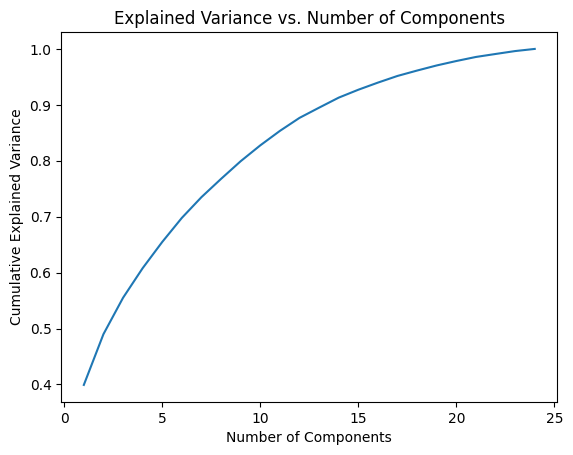

Number of components to retain 95% variance: 17


In [34]:
import matplotlib.pyplot as plt

# Fit PCA to the data
pca = PCA()
pca.fit(df_scaled)

# Plot the cumulative explained variance
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

# For example, select number of components that explain 95% of the variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1  # +1 because index starts at 0
print(f"Number of components to retain 95% variance: {n_components}")


In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Step 1: Select only numeric features
df_numeric = df_cleaned.select_dtypes(include=["number"])

# Step 2: Handle missing values for numeric columns only
imputer = SimpleImputer(strategy='mean')  # You can use 'bfill', 'ffill' as needed
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Step 3: Scale the numeric data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric_imputed)

# Step 4: Apply PCA
pca = PCA(n_components=17)  # Adjust the number of components you want to keep
df_pca = pca.fit_transform(df_scaled)

# Step 5: Create a DataFrame for PCA results
df_pca_df = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# Show the first few rows of the PCA results
df_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-8.335930,-1.967452,-0.484889,0.616955,1.568722,-1.113785,-2.733597,-0.632440,-1.032905,-2.168292,-0.920020,5.828490,0.107949,-2.239249,1.844137,3.083783,-1.322037
1,-4.039269,-1.030926,0.798740,0.187623,-0.336450,-0.627063,0.865599,-0.348471,-0.496091,0.463157,0.203323,0.068142,-0.064642,-0.172123,-0.530394,-0.257732,0.060413
2,-4.354831,-1.779788,0.324703,0.122287,-0.484584,-0.377888,-0.520718,0.621652,-0.559455,0.483939,-0.276827,-0.335883,-0.235899,0.168636,-0.143006,0.267381,0.196122
3,0.377597,1.782340,0.190115,1.958758,0.370943,0.564374,-0.271040,-0.723368,0.523524,-1.000178,-0.773346,-0.600076,-0.012152,-0.208880,-0.008291,-0.758885,-0.004010
4,0.563256,4.238706,0.200923,1.736056,1.505346,-1.152510,-2.620029,-0.742354,-0.868673,0.021586,-1.991340,-1.123178,1.756125,-0.341707,0.319238,-0.263302,-0.831125


In [44]:
from sklearn.cluster import AgglomerativeClustering

# Applying Agglomerative Clustering to the PCA data
n_clusters = 5  # Set the number of clusters (adjust as necessary)
agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Fit the model and get cluster assignments
df_cleaned['Cluster'] = agglomerative.fit_predict(df_pca_df)

# Show the resulting clusters
df_cleaned[['Country Name', 'Cluster']].head()


<ipython-input-44-4211c19962e9>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country Name,Cluster
0,Afghanistan,3
1,Africa Eastern and Southern,3
2,Africa Western and Central,3
3,Albania,2
4,Algeria,2


In [45]:
df_cleaned["Cluster"].unique()

array([3, 2, 1, 0, 4])

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Since there's no target variable, we'll need a target for supervised learning.
# For now, let's assume you're interested in clustering or feature importance,
# which means you could use a dummy target for feature importance calculation.

# Create a dummy target variable (this is just for feature importance)
df_cleaned['DummyTarget'] = [1 if i % 2 == 0 else 0 for i in range(len(df_cleaned))]

# Split data into features (X) and target (y)
X = df_pca_df  # PCA-transformed features
y = df_cleaned['DummyTarget']  # Dummy target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Get the feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display the importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df.head())


<ipython-input-48-9ec44db2c7c4>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



   Feature  Importance
8      PC9    0.074241
13    PC14    0.066734
14    PC15    0.066611
10    PC11    0.065891
1      PC2    0.065645


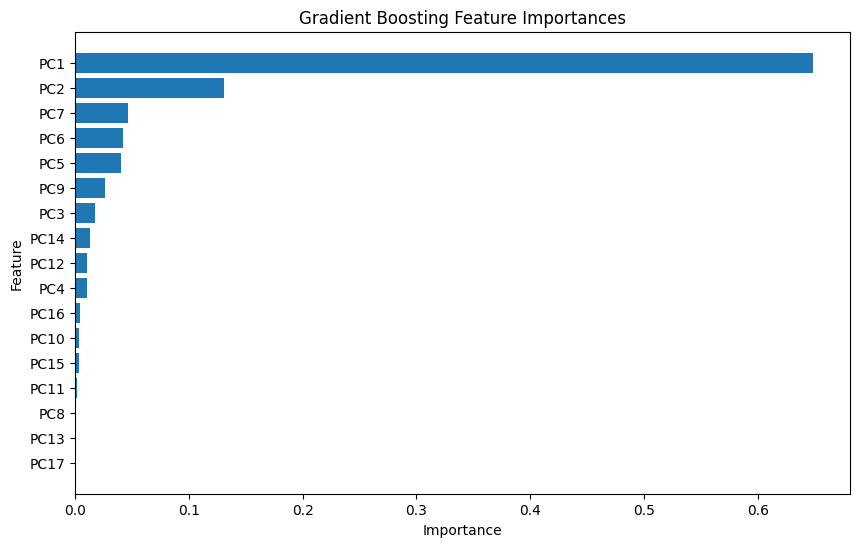

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np

# Initialize Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the PCA-transformed data
gb.fit(df_pca_df, df_cleaned["Cluster"])  # Assuming "Cluster" is the target from Agglomerative Clustering

# Extract feature importances
importances = gb.feature_importances_

# Sort feature importances for visualization
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), np.array(df_pca_df.columns)[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Gradient Boosting Feature Importances")
plt.show()



In [52]:
from sklearn.cluster import AgglomerativeClustering

# Select only the top 2 principal components
df_pca_top2 = df_pca_df[['PC1', 'PC2']]

# Apply Agglomerative Clustering
n_clusters = 5  # Adjust as needed
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Fit and predict clusters
df_cleaned['Cluster_top2'] = agg_clustering.fit_predict(df_pca_top2)

# Show the new cluster assignments
df_cleaned[['Country Name', 'Cluster_top2']]


<ipython-input-52-ab41c69cda70>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country Name,Cluster_top2
0,Afghanistan,3
1,Africa Eastern and Southern,3
2,Africa Western and Central,3
3,Albania,1
4,Algeria,1
...,...,...
261,West Bank and Gaza,1
262,World,1
263,"Yemen, Rep.",4
264,Zambia,4


Silhouette Score: 0.3503


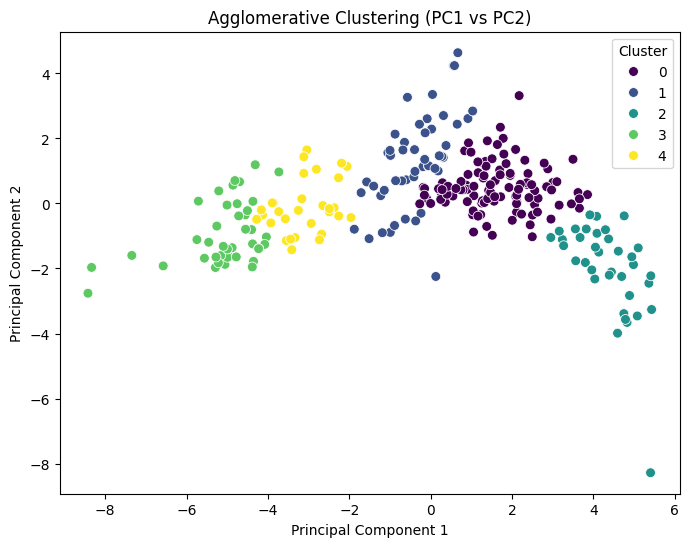

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Compute silhouette score
sil_score = silhouette_score(df_pca_top2, df_cleaned['Cluster_top2'])
print(f"Silhouette Score: {sil_score:.4f}")

# Scatter plot of PC1 vs PC2
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca_top2['PC1'], y=df_pca_top2['PC2'], hue=df_cleaned['Cluster_top2'], palette='viridis', s=50)
plt.title('Agglomerative Clustering (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()


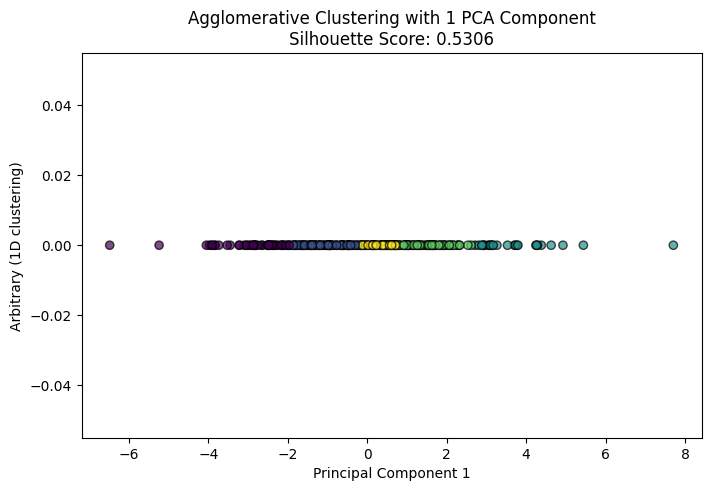

0.5305843460866502

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



# Apply Agglomerative Clustering
n_clusters = 5  # Keeping the same number of clusters as before
agg_clustering_pc1 = AgglomerativeClustering(n_clusters=n_clusters)
labels_pc1 = agg_clustering_pc1.fit_predict(X_pc1)

# Compute silhouette score
silhouette_pc1 = silhouette_score(X_pc1, labels_pc1)

# Plot clusters along PC1
plt.figure(figsize=(8, 5))
plt.scatter(X_pc1, np.zeros_like(X_pc1), c=labels_pc1, cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Arbitrary (1D clustering)")
plt.title(f"Agglomerative Clustering with 1 PCA Component\nSilhouette Score: {silhouette_pc1:.4f}")
plt.show()

# Return the silhouette score
silhouette_pc1


# We can make a visualization of a globe spinning and the index, time series animated viz

---

